In [241]:
%config InlineBackend.figure_format = 'retina' 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task: Data Exploration and Preprocessing
### Explore the dataset and identify the number of rows and columns.
### Check for missing values in each column and handle them accordingly.
### Perform data type conversion if necessary.
### Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [242]:
df = pd.read_csv('dataset.csv')

In [243]:
df.shape

(9551, 21)

In [244]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [245]:
df.columns[df.isnull().any()].tolist()

['Cuisines']

In [246]:
df = df.dropna()

In [247]:
df.columns[df.isnull().any()].tolist()

[]

In [248]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [249]:
df['Aggregate rating'].value_counts().sort_index()

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64

In [250]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

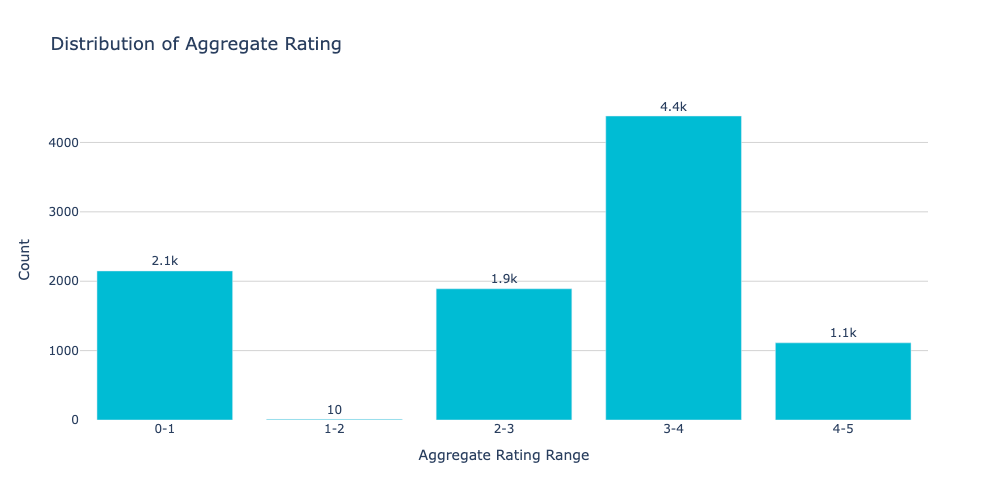

In [251]:
# Define bins and labels
bins = [0,1,2,3,4,5]
labels = ['0-1','1-2','2-3','3-4','4-5']

# Created binned column
df['Rating Range'] = pd.cut(df['Aggregate rating'] , bins = bins , labels = labels , include_lowest = True)

# Count values in each bin
rating_binned_counts = df['Rating Range'].value_counts().sort_index().reset_index()
rating_binned_counts.columns = ['Rating Range', 'Count']


fig = px.bar(
    rating_binned_counts,
    x='Rating Range',
    y='Count',
    text = 'Count',
    title='Distribution of Aggregate Rating',
    color_discrete_sequence=['#00BCD4']
)

fig.update_layout(
    xaxis_title='Aggregate Rating Range',
    yaxis_title='Count',
    title_font_size=18,
    plot_bgcolor='white',
    yaxis=dict(gridcolor='lightgray'),
)
fig.update_layout(height = 500,width = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [252]:
# Class Distribution
rating_counts = df['Rating Range'].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(rating_counts)

Class distribution (%):
Rating Range
3-4    45.912807
0-1    22.511004
2-3    19.817648
4-5    11.653741
1-2     0.104800
Name: proportion, dtype: float64


In [253]:
print((df['Aggregate rating'] == 0).sum())


2148


## Task2: Descriptive Analysis
### Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.
### Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".
### Identify the top cuisines and cities with the highest number of restaurants.

In [254]:
df.dtypes

Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color              object
Rating text               object
Votes                      int64
Rating Range            category
dtype: object

In [255]:
cols = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']
summary_stats = pd.DataFrame({
    'Mean': df[cols].mean(),
    'Median': df[cols].median(),
    'Standard Deviation': df[cols].std()
})

print("\nSummary Statistics:")
summary_stats.round(2)



Summary Statistics:


Mean  Median  Standard Deviation
Aggregate rating         2.67     3.2                1.52
Average Cost for two  1200.33   400.0            16128.74
Price range              1.80     2.0                0.91
Votes                  156.77    31.0              430.20

In [256]:
df[cols].describe()

Aggregate rating  Average Cost for two  Price range         Votes
count       9542.000000           9542.000000  9542.000000   9542.000000
mean           2.665238           1200.326137     1.804968    156.772060
std            1.516588          16128.743876     0.905563    430.203324
min            0.000000              0.000000     1.000000      0.000000
25%            2.500000            250.000000     1.000000      5.000000
50%            3.200000            400.000000     2.000000     31.000000
75%            3.700000            700.000000     2.000000    130.000000
max            4.900000         800000.000000     4.000000  10934.000000

In [257]:
country = df['Country Code'].value_counts()
country.columns = ['Country Code', 'Counts']
country

Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [258]:
Cuisines = df['Cuisines'].value_counts()
Cuisines.columns = ['Cuisines', 'Counts']
print("\nTop 10 Cuisines by Number of Restaurants Serving Them:")
Cuisines.head(10)


Top 10 Cuisines by Number of Restaurants Serving Them:


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [259]:
city = df['City'].value_counts()
city.columns = ['City', 'Counts']
print("Top 10 Cities by Number of Restaurants:")
city.head(10)

Top 10 Cities by Number of Restaurants:


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

# Task3: Geospatial Analysis
### Visualize the locations of restaurants on a map using latitude and longitude information.
### Analyze the distribution of restaurants across different cities or countries.
### Determine if there is any correlation between the restaurant's location and its rating.

In [260]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating Range'],
      dtype='object')

In [261]:
city = df['City'].value_counts()
city.columns = ['City', 'Counts']
print("Top 10 Cities by Number of Restaurants:")
city.head(10)

Top 10 Cities by Number of Restaurants:


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

In [262]:
country = df['Country Code'].value_counts()
country.columns = ['Country Code', 'Counts']
print("\nRestaurant Count by Country Code:")
country


Restaurant Count by Country Code:


Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

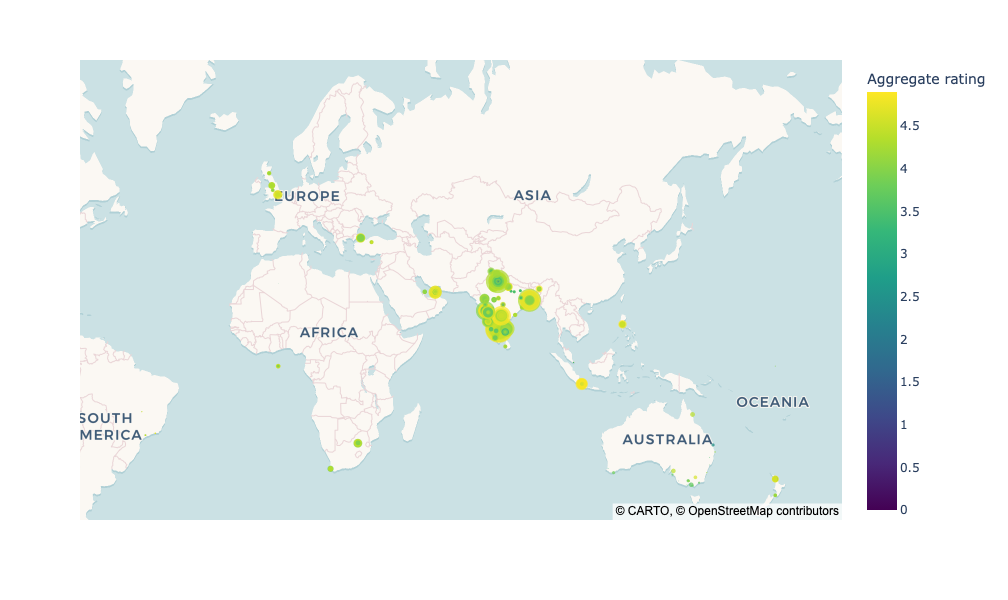

In [273]:
import plotly.express as px

fig = px.scatter_map(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={
        "Address": True,
        "Cuisines": True,
        "Aggregate rating": True,
        "Price range": True,
        "Votes": True
    },
    color="Aggregate rating",
    size="Votes",
    color_continuous_scale="Viridis",
    size_max=20,
    zoom=1,
    height=600
)

# fig.update_layout(
#     mapbox_style="open-street-map"  # Optional, defaults to this
# )

fig.show()


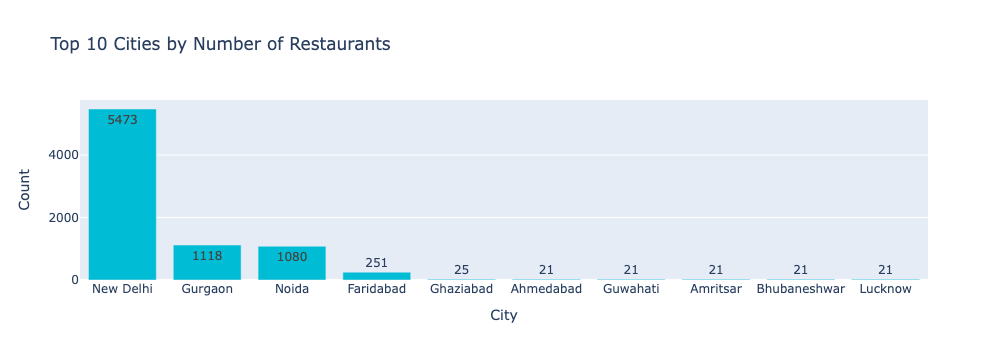

In [264]:
city_counts = df['City'].value_counts().sort_values(ascending=False).head(10)
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City','Count']
fig = px.bar(
    city_counts_df,
    x='City',
    y='Count',
    text='Count',
    title='Top 10 Cities by Number of Restaurants',
    color_discrete_sequence=['#00BCD4']
)
fig.show()


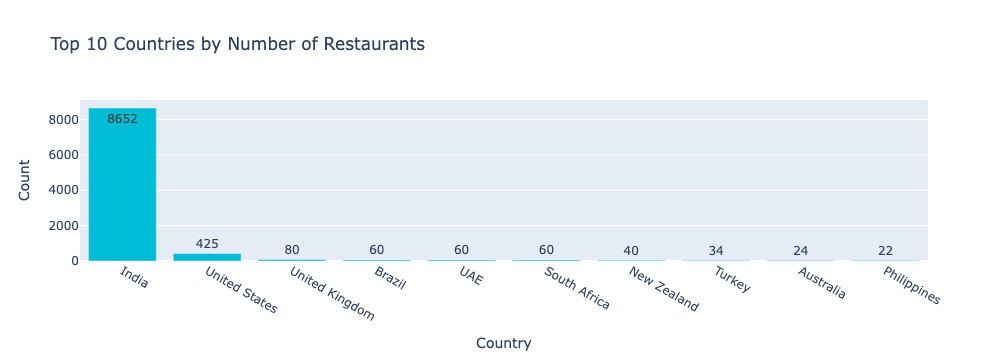

In [265]:
code_to_country = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'United Kingdom',
    216: 'United States'
}

# Get top 10 countries by restaurant count
country_counts = df['Country Code'].value_counts().sort_values(ascending=False).head(10)
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country Code', 'Count']

# Add readable country names
country_counts_df['Country'] = country_counts_df['Country Code'].map(code_to_country)

# Plot
fig = px.bar(
    country_counts_df,
    x='Country',
    y='Count',
    text='Count',
    title='Top 10 Countries by Number of Restaurants',
    color_discrete_sequence=['#00BCD4']
)
fig.show()

In [266]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating Range'],
      dtype='object')

In [267]:
# Convert city to numeric codes
df['City_encoded'] = df['City'].astype('category').cat.codes

# Check correlation
cor_city = df['City_encoded'].corr(df['Aggregate rating'])
print("Correlation between City and Rating:", cor_city)

# If country exists
if 'Country Code' in df.columns:
    cor_country = df['Country Code'].corr(df['Aggregate rating'])
    print("Correlation between Country Code and Rating:", cor_country)


Correlation between City and Rating: -0.13084833441939586
Correlation between Country Code and Rating: 0.28129524976374376


In [268]:
city_means = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head()
print(city_means)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


In [269]:
num_cities = df['City'].nunique()
num_cities

140

In [270]:
top_10_cities

num_restaurants  avg_rating
City                                     
New Delhi                4295    2.438845
Gurgaon                   943    2.651431
Noida                     902    2.036204
Faridabad                 235    1.866932
Ghaziabad                  25    2.852000
Amritsar                   21    3.685714
Ahmedabad                  21    4.161905
Guwahati                   21    4.190476
Bhubaneshwar               21    3.980952
Lucknow                    21    4.195238

In [271]:
num_restaurants = df['Restaurant Name'].nunique()
num_restaurants

7437

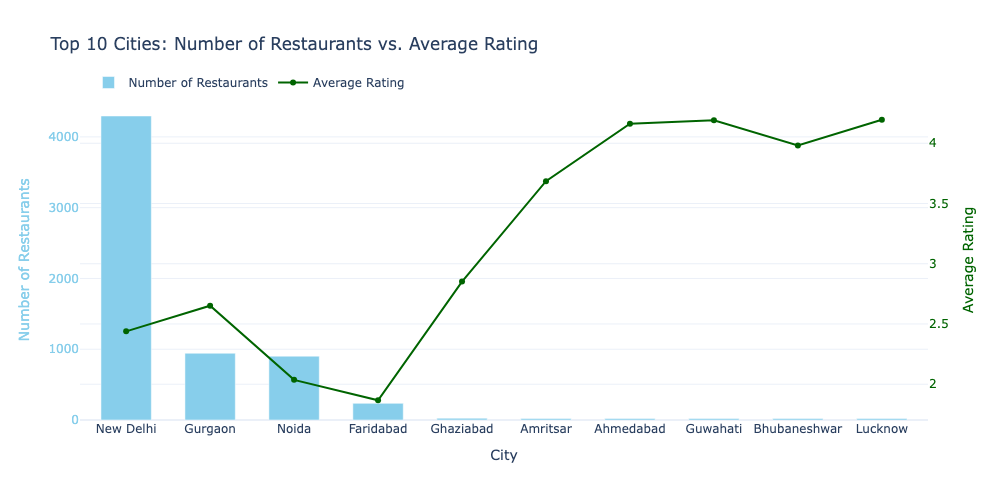

In [272]:
import plotly.graph_objects as go

fig = go.Figure()

# Bar trace for number of restaurants
fig.add_trace(go.Bar(
    x=top_10_cities.index,
    y=top_10_cities['num_restaurants'],
    name='Number of Restaurants',
    marker_color='skyblue'
))

# Line trace for average rating, linked to yaxis2
fig.add_trace(go.Scatter(
    x=top_10_cities.index,
    y=top_10_cities['avg_rating'],
    name='Average Rating',
    mode='lines+markers',
    marker=dict(color='darkgreen'),
    yaxis='y2'
))

fig.update_layout(
    title='Top 10 Cities: Number of Restaurants vs. Average Rating',
    xaxis=dict(title='City'),
    yaxis=dict(
        title=dict(text='Number of Restaurants', font=dict(color='skyblue')),
        tickfont=dict(color='skyblue'),
    ),
    yaxis2=dict(
        title=dict(text='Average Rating', font=dict(color='darkgreen')),
        overlaying='y',
        side='right',
        tickfont=dict(color='darkgreen'),
    ),
    legend=dict(x=0.01, y=1.1, orientation="h"),
    bargap=0.4,
    template='plotly_white'
)
fig.update_layout(width = 1000 ,height = 500)
fig.show()


## Task: Predictive Modeling
### Build a regression model to predict the aggregate rating of a restaurant based on available features.
### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
### Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.

In [275]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Online delivery  \
0        French, Japanese, Desserts  ...                   No   
1                          Japanese  ...                   No   
2  Seafood, Asian, Filipino, Indian  ...                   No   
3                   Japanese, Sushi  ...                   No   
4                  Japanese, Korean  ...                   No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   
2                No                   No           4              4.4   
3                No                   No           4              4.9   
4                No                   No           4              4.8   

  Rating color  Rating text  Votes Rating Range City_encoded  
0   Dark Green    Excellent    314          4-5           73  
1   Dark Green    Excellent    591          4-5           73  
2        Green    Very Good    270          4-5           75  
3   Dark Green    Excellent    365          4-5           75  
4   Dark Green    Excellent    229          4-5           75  

[5 rows x 23 columns]